In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

### Constants

In [332]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [333]:
df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')


In [334]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [335]:
df['accel_lon']=df['accel_lon'].add(OFFSET)
df['accel_trans']=df['accel_trans'].add(OFFSET)
df['accel_down']=df['accel_down'].add(OFFSET)

df['speed'] = df.apply(lambda x: int(x['speed']*FACTOR_MULTIPLY) , axis=1)
df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)

### Data column combinations 
(uncomment only one 'points' at a time)

In [336]:
# Combination speed + accel_lon
# points = df[['speed','accel_lon']].to_numpy()

# Combination speed + accel_trans
# points = df[['speed','accel_trans']].to_numpy()

# Combination speed + accel_down
# points = df[['speed','accel_down']].to_numpy()

In [339]:
# Combination accel_lon + accel_trans
# points = df[['accel_lon','accel_trans']].to_numpy()

# Combination accel_lon + accel_down
# points = df[['accel_lon','accel_down']].to_numpy()

In [341]:
# Combination accel_trans + accel_lon
# points = df[['accel_trans','accel_lon']].to_numpy()

# Combination accel_trans + accel_down
# points = df[['accel_trans','accel_down']].to_numpy()

In [343]:
# Combination accel_down + accel_lon
# points = df[['accel_down','accel_lon']].to_numpy()

# Combination accel_down + accel_trans
# points = df[['accel_down','accel_trans']].to_numpy()

### Hilbert indexing

In [345]:
# Declare Hilbert_curve
resolution = 26; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

# Generate Hilbert index
distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

### Hilbert Plots

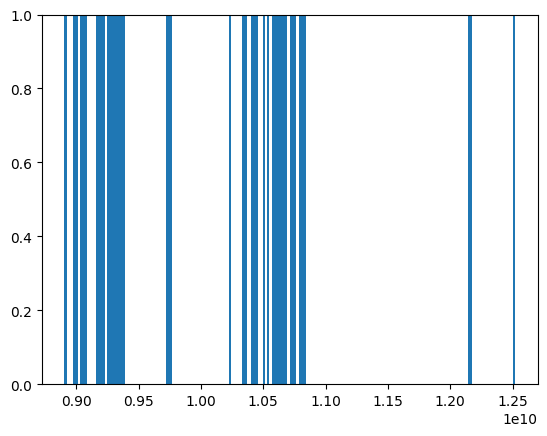

In [346]:
# Plot hilbert
plt.hist(df_hilbert['hilbert'], bins=200)

# Limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
# Limit x axis if need to zoom into specific area
# plt.xlim(9000000000, 13000000000)

plt.show()